## Importing the libraries and reading the tsv file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
dataset=pd.read_csv(r"D:\DATA SCIENCE\Data\SpamData.tsv",delimiter="\t")

In [3]:
dataset

,Output,Input
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
...,...,...
5563,spam,This is the 2nd time we have tried 2 contact u...
5564,ham,Will ü b going to esplanade fr home?
5565,ham,"Pity, * was in mood for that. So...any other s..."
5566,ham,The guy did some bitching but I acted like i'd...


In [4]:
new=[]

In [5]:
for i in range(0,5568):
    word=dataset["Output"][i]
    if word=="spam":
        new.append("1")
    else:
        new.append("0")

In [6]:
dataset["Result"]=new

In [7]:
dataset

,Output,Input,Result
0,ham,I've been searching for the right words to tha...,0
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
2,ham,"Nah I don't think he goes to usf, he lives aro...",0
3,ham,Even my brother is not like to speak with me. ...,0
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,0
...,...,...,...
5563,spam,This is the 2nd time we have tried 2 contact u...,1
5564,ham,Will ü b going to esplanade fr home?,0
5565,ham,"Pity, * was in mood for that. So...any other s...",0
5566,ham,The guy did some bitching but I acted like i'd...,0


# Stopwords

In [8]:
#Natural Language Toolkit
import nltk

In [9]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vamshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
#Corpus - Group of documents or text is called as corpus
from nltk.corpus import stopwords

In [11]:
sw = stopwords.words("english")
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Lemmatization

In [12]:
import re
from nltk.stem import WordNetLemmatizer

In [13]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vamshi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
wl=WordNetLemmatizer()
wl.lemmatize("trouble",pos="v")

'trouble'

In [15]:
dataset.shape

(5568, 3)

In [16]:
corpus_l=[]
for i in range(0,5568):
    message=dataset["Input"][i]
    message=re.sub("[^a-zA-Z]"," ",message)
    message=message.lower()
    message=message.split()
    c=[]
    for word in message:
        if word not in sw:
            c.append(wl.lemmatize(word,pos="v"))
    message=" ".join(c)
    corpus_l.append(message)

# Word Cloud

In [17]:
from wordcloud import WordCloud

In [18]:
wc=WordCloud(background_color="black",width=700,height=400)
c=" ".join(map(str,corpus_l))
word_cloud=wc.generate(c)
word_cloud

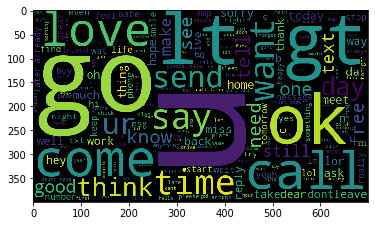

In [19]:
plt.imshow(word_cloud)

In [20]:
#word_cloud.to_file("Words_s.png")

In [21]:
word_cloud.words_

{'u': 1.0,
 'go': 0.4579185520361991,
 'lt gt': 0.2497737556561086,
 'ok': 0.2343891402714932,
 'come': 0.22986425339366515,
 'call': 0.2235294117647059,
 'love': 0.21357466063348415,
 'say': 0.2,
 'time': 0.19728506787330316,
 'want': 0.19728506787330316,
 'send': 0.18914027149321266,
 'ur': 0.18914027149321266,
 'think': 0.18371040723981902,
 'day': 0.17737556561085974,
 'know': 0.17194570135746606,
 'need': 0.17194570135746606,
 'tell': 0.16832579185520363,
 'see': 0.16832579185520363,
 'free': 0.15565610859728507,
 'one': 0.15384615384615385,
 'good': 0.14751131221719457,
 'text': 0.1420814479638009,
 'still': 0.1420814479638009,
 'make': 0.1339366515837104,
 'today': 0.1321266968325792,
 'da': 0.12941176470588237,
 'work': 0.12307692307692308,
 'take': 0.12126696832579185,
 'meet': 0.11855203619909502,
 'give': 0.11855203619909502,
 'ask': 0.11764705882352941,
 'lor': 0.11402714932126697,
 'n': 0.11312217194570136,
 'sorry': 0.11040723981900452,
 'back': 0.1085972850678733,
 'dont

In [22]:
corpus_l

['search right word thank breather promise wont take help grant fulfil promise wonderful bless time',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'nah think go usf live around though',
 'even brother like speak treat like aid patent',
 'date sunday',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune callers press copy friends callertune',
 'winner value network customer select receivea prize reward claim call claim code kl valid hours',
 'mobile months u r entitle update latest colour mobiles camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cry enough today',
 'six chance win cash pound txt csh send cost p day days tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'xxxmobilemovieclub use credit click wap link next txt message click http wap xxxmobilemovieclub com n qjkgighjjgcbl

## Applying CountVectorizer

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
cv=CountVectorizer()

In [25]:
x=cv.fit_transform(corpus_l).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [26]:
x.shape

(5568, 6654)

In [27]:
len(cv.get_feature_names())

6654

In [28]:
pd.DataFrame(x,columns=cv.get_feature_names())

,aa,aah,aaniye,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,...,zero,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
y=dataset["Result"]

In [30]:
y.shape

(5568,)

# Train and Test Splits

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
x.astype(int)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [34]:
y.astype(int)

0       0
1       1
2       0
3       0
4       0
       ..
5563    1
5564    0
5565    0
5566    0
5567    0
Name: Result, Length: 5568, dtype: int32

# Applying Algorithm

In [35]:
from sklearn.naive_bayes import MultinomialNB

In [36]:
nb = MultinomialNB()

In [37]:
nb.fit(x_train,y_train)

MultinomialNB()

In [38]:
y_pred=nb.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_test,y_pred)

0.9757630161579892

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(y_test,y_pred)

array([[943,  22],
       [  5, 144]], dtype=int64)

# Saving Model

In [75]:
import pickle
import joblib

In [77]:
pickle.dump(cv,open('tranform.pkl','wb'))

In [78]:
pickle.dump(nb,open('nbmodel.pkl','wb'))

# Real Time Predictions Not Spam

In [70]:
m="I will come with karnan car. Please wait till 6pm will directly goto doctor."
m=cv.transform([m]).toarray()

In [71]:
m.shape

(1, 6654)

In [72]:
pd.DataFrame(m, columns=cv.get_feature_names())

,aa,aah,aaniye,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,...,zero,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
nb.predict(m)

array(['0'], dtype='<U1')

# Real Time Predictions Spam

In [66]:
msg="Congrats 2 mobile 3G Videophones R yours. call 09063458130 now! videochat wid ur mates, play java games, Dload polypH music, noline rentl. bx420. ip4. 5we. 150p"
msg=cv.transform([msg]).toarray()

In [67]:
m.shape

(1, 6654)

In [68]:
pd.DataFrame(msg,columns=cv.get_feature_names())

,aa,aah,aaniye,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,...,zero,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
nb.predict(msg)

array(['1'], dtype='<U1')